In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
#import dataset
Products = pd.read_csv("Products_Filtered.csv")


In [39]:
#check the shape of our data frame
Products.shape

(606, 17)

In [40]:
#check the information of the dataframe 
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductAlternateKey    606 non-null    object 
 2   ProductSubcategoryKey  606 non-null    int64  
 3   EnglishProductName     606 non-null    object 
 4   FrenchProductName      319 non-null    object 
 5   StandardCost           395 non-null    float64
 6   FinishedGoodsFlag      606 non-null    bool   
 7   SafetyStockLevel       606 non-null    int64  
 8   ReorderPoint           606 non-null    int64  
 9   ListPrice              395 non-null    float64
 10  Weight                 282 non-null    float64
 11  DaysToManufacture      606 non-null    int64  
 12  ProductLine            380 non-null    object 
 13  DealerPrice            395 non-null    float64
 14  Class                  330 non-null    object 
 15  ModelN

In [41]:
#drop all object colums to use the numeric variables for classification
Products=Products.drop('ProductAlternateKey',axis=1)
Products=Products.drop('EnglishProductName',axis=1)
Products=Products.drop('FrenchProductName',axis=1)
Products=Products.drop('ProductLine',axis=1)
Products=Products.drop('Class',axis=1)
Products=Products.drop('ModelName',axis=1)
Products=Products.drop('Status',axis=1)



In [42]:
#check the information of the dataframe again 
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductSubcategoryKey  606 non-null    int64  
 2   StandardCost           395 non-null    float64
 3   FinishedGoodsFlag      606 non-null    bool   
 4   SafetyStockLevel       606 non-null    int64  
 5   ReorderPoint           606 non-null    int64  
 6   ListPrice              395 non-null    float64
 7   Weight                 282 non-null    float64
 8   DaysToManufacture      606 non-null    int64  
 9   DealerPrice            395 non-null    float64
dtypes: bool(1), float64(4), int64(5)
memory usage: 43.3 KB


In [43]:
#describe the dataframe
Products.describe()


,ProductKey,ProductSubcategoryKey,StandardCost,SafetyStockLevel,ReorderPoint,ListPrice,Weight,DaysToManufacture,DealerPrice
count,606.00000,606.000000,395.000000,606.000000,606.000000,395.000000,282.000000,606.000000,395.000000
mean,303.50000,7.945545,434.265829,495.201320,371.400990,747.661762,56.193227,1.201320,448.597060
std,175.08141,9.561044,497.379884,364.007114,273.005336,838.708451,158.000652,1.508893,503.225071
min,1.00000,0.000000,0.856500,4.000000,3.000000,2.290000,2.120000,0.000000,1.374000
25%,152.25000,0.000000,37.120900,100.000000,75.000000,69.990000,2.680000,0.000000,41.994000
50%,303.50000,2.000000,204.625100,500.000000,375.000000,364.090000,15.420000,1.000000,218.454000
75%,454.75000,14.000000,660.914200,1000.000000,750.000000,1204.324800,24.130000,1.000000,722.594900
max,606.00000,37.000000,2171.294200,1000.000000,750.000000,3578.270000,1050.000000,4.000000,2146.962000


In [44]:
#check for missing values in the dataframe(where false means No missing or NAN value and True means there are Missing values or NAN )
Products.isnull()

,ProductKey,ProductSubcategoryKey,StandardCost,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,ListPrice,Weight,DaysToManufacture,DealerPrice
0,False,False,True,False,False,False,True,True,False,True
1,False,False,True,False,False,False,True,True,False,True
2,False,False,True,False,False,False,True,True,False,True
3,False,False,True,False,False,False,True,True,False,True
4,False,False,True,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
601,False,False,False,False,False,False,False,False,False,False
602,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False


In [45]:
#drop missing values
Products=Products.dropna()

In [46]:
#check dataframe again for NAN or missing values
Products.isnull()

,ProductKey,ProductSubcategoryKey,StandardCost,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,ListPrice,Weight,DaysToManufacture,DealerPrice
237,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
601,False,False,False,False,False,False,False,False,False,False
602,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False


In [47]:
#check number of missing values in the whole dataframe
Products.isnull().sum()

ProductKey               0
ProductSubcategoryKey    0
StandardCost             0
FinishedGoodsFlag        0
SafetyStockLevel         0
ReorderPoint             0
ListPrice                0
Weight                   0
DaysToManufacture        0
DealerPrice              0
dtype: int64

In [48]:
#check the values in our 'Days to manufacture' variable
Products['DaysToManufacture'].value_counts()

1    136
4    125
2     12
Name: DaysToManufacture, dtype: int64

C:\Users\44787\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


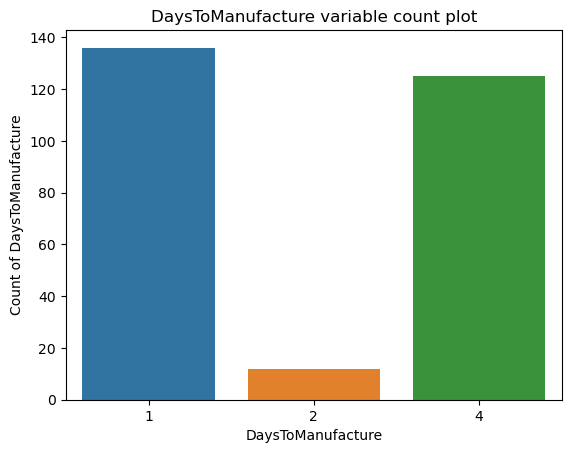

In [49]:
#create a plot for our 'Days to manufacture variable'
sns.countplot(Products['DaysToManufacture'])
plt.xlabel('DaysToManufacture')
plt.ylabel('Count of DaysToManufacture')
plt.title('DaysToManufacture variable count plot')
plt.show()

In [50]:
#split dataframe to x and y

X=Products.iloc[:,:-2]
y=Products.iloc[:,-2]

In [51]:
#check for the shape of x
X.shape

(273, 8)

In [52]:
#check for the shape of y
y.shape

(273,)

In [53]:
#split dataframe to training and test

In [54]:
#import library from sklearn and use it to split the dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [55]:
#import Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clp=RandomForestClassifier(criterion='gini',
                          max_depth=8,
                          min_samples_split=10,
                           random_state=5)

In [56]:
#input the random forest classifier
clp.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [57]:
#get the importance of each variable in terms of their percentage
clp.feature_importances_

array([0.05655256, 0.26838362, 0.06280255, 0.        , 0.19785648,
       0.26082564, 0.03180642, 0.12177274])

In [58]:
#check which columns are more important in the dataframe
Products.columns

Index(['ProductKey', 'ProductSubcategoryKey', 'StandardCost',
       'FinishedGoodsFlag', 'SafetyStockLevel', 'ReorderPoint', 'ListPrice',
       'Weight', 'DaysToManufacture', 'DealerPrice'],
      dtype='object')

In [59]:
#predictions for the X_test
y_pred=clp.predict(X_test)

In [60]:
y_pred

array([1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1,
       4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       1, 4, 1], dtype=int64)

In [61]:
#check for correctly classified and misclassified variables with confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[34,  0,  0],
       [ 2,  0,  0],
       [ 0,  0, 33]], dtype=int64)

In [62]:
#check for overall accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9710144927536232

In [63]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clp,X_train,y_train,cv=15)

C:\Users\44787\anaconda3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  warnings.warn(


array([0.92857143, 0.92857143, 1.        , 1.        , 1.        ,
       1.        , 0.92857143, 0.92857143, 0.92857143, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [64]:
#import classification report 
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           1       1.00      0.94      0.97        36
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        33

    accuracy                           0.97        69
   macro avg       0.67      0.65      0.66        69
weighted avg       1.00      0.97      0.99        69



C:\Users\44787\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44787\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44787\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


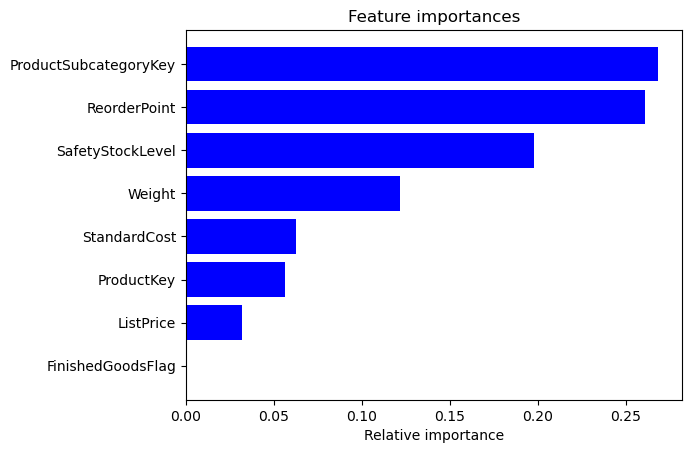

In [65]:
#plot important features in the model
features=Products.columns
importances=clp.feature_importances_
indices=np.argsort(importances)
plt.title('Feature importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.xlabel('Relative importance')
plt.show()
